In [ ]:
#Importing the necessary libararies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
#Set the filepath for the CSV file
filepath = '/content/drive/MyDrive/Colab Notebooks/Project_real/iot23_combined.csv'

# Loading the CSV file into the Pandas Dataframe
df = pd.read_csv(filepath, nrows=400000)


In [ ]:
#Extracting the feature columns from the DataFrame
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

#Extracting the target column from the DataFrame
Y = df['label']

In [ ]:
# Printing the value counts of the target column
df['label'].value_counts()

label
PartOfAHorizontalPortScan    264483
Benign                        50012
Okiru                         47847
DDoS                          24959
-   Benign   -                 8828
Attack                         3814
C&C-Torii                        30
C&C-HeartBeat                    20
C&C                               7
Name: count, dtype: int64

In [ ]:
df #Loads the CSV file Within the Dataframe

,Unnamed: 0,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.540469e+09,192.168.1.132,384.518261,15072,0,0.0,48.0,16416.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,3,1.540470e+09,192.168.1.132,0.270332,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.540470e+09,192.168.1.132,0.111429,48,48,0.0,1.0,76.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,91562,1.545337e+09,192.168.1.197,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0
399996,91563,1.545337e+09,192.168.1.197,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0
399997,91564,1.545337e+09,192.168.1.197,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0
399998,91565,1.545337e+09,192.168.1.197,0.000000,0,0,0.0,1.0,40.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

Random Forest program start...
Random Forest Score: 0.798025
Random Forest Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

           -   Benign   -       0.93      0.72      0.81      1709
                   Attack       1.00      1.00      1.00       797
                   Benign       0.99      0.90      0.94     10088
                      C&C       0.00      0.00      0.00         1
            C&C-HeartBeat       0.38      0.75      0.50         4
                C&C-Torii       1.00      0.25      0.40         4
                     DDoS       0.00      0.00      0.00      4928
                    Okiru       0.80      0.00      0.00      9665
PartOfAHorizontalPortScan       0.77      1.00      0.87     52804

                 accuracy                           0.80     80000
                macro avg       0.65      0.51      0.50     80000
             weighted avg       0.76      0.80      0.72     80000

Confusion Matrix for Random Forest:
[[ 1236     0    38     0     0     0     0     1   434]
 [    0   796     0     0     0  

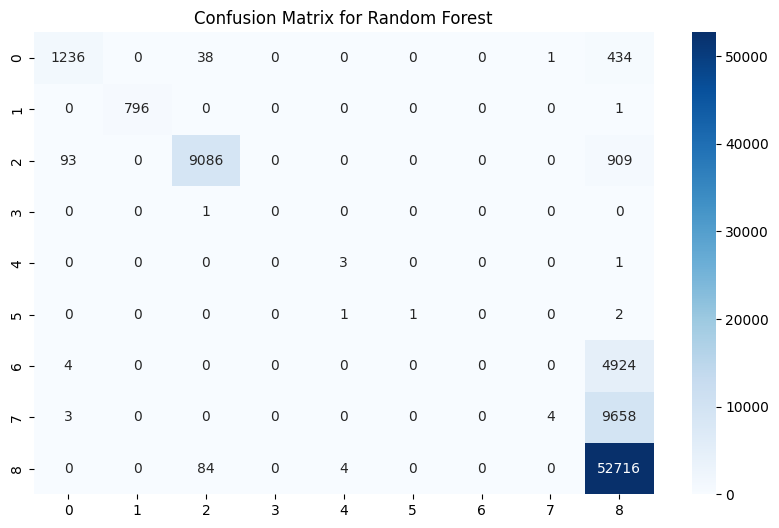

Time cost: 25.381763219833374 seconds


In [ ]:

RF = RandomForestClassifier() #Initialising the Random Forest Classifier

#Training the Random Forest classifer on the training data
start = time.time()
print('Random Forest program start...')
RF.fit(X_train, Y_train)

#Make Predictions on the testing data using the Random Forest Classifier
y_pred_rf = RF.predict(X_test)
score_rf = RF.score(X_test, Y_test) # Making Predicitions on the testing data using the Random Forest Classifer

#printing the accuracy score of the Random Forest Classifier
print('Random Forest Score:', score_rf)

#Printing the classification report for the Random Forest Classifier
print("Random Forest Classification Report:")
print(classification_report(Y_test, y_pred_rf))

#Printing out the Confusion matrix for the Random Forest Classifier
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

#Plotting the Confusion Matrix Heatmap for the Random Forest Classifier
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

print('Time cost:', time.time() - start, 'seconds') #Printing the time taken to train and test the Random Forest Classifier
accuracy_score_rf1 = accuracy_score(Y_test, y_pred_rf)


KNN program start...
KNN Score: 0.73705
Time cost: 281.5169930458069 seconds
KNN Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

           -   Benign   -       0.92      0.72      0.81      1709
                   Attack       0.99      0.99      0.99       797
                   Benign       0.98      0.90      0.94     10088
                      C&C       0.00      0.00      0.00         1
            C&C-HeartBeat       0.17      0.25      0.20         4
                C&C-Torii       0.33      0.25      0.29         4
                     DDoS       0.00      0.00      0.00      4928
                    Okiru       0.25      0.53      0.34      9665
PartOfAHorizontalPortScan       0.88      0.81      0.84     52804

                 accuracy                           0.74     80000
                macro avg       0.50      0.49      0.49     80000
             weighted avg       0.76      0.74      0.74     80000

Confusion Matrix for KNN:
[[ 1228     0    45     0     0     0     0     1   435]
 [    0   793     2     0     0     0     0

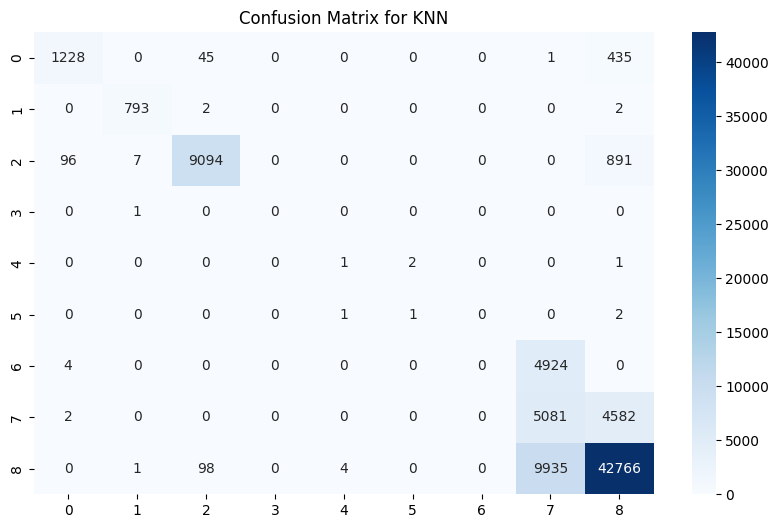

In [ ]:
KNN = KNeighborsClassifier() #Initialising the KNN Classifier

#Training the KNN classifer on the training data
start = time.time()
print('KNN program start...')
KNN.fit(X_train, Y_train)

#Make Predictions on the testing data using the Classifier
y_pred_knn = KNN.predict(X_test)
score_knn = KNN.score(X_test, Y_test) # Making Predicitions on the testing data using the KNN Classifer

#printing the accuracy score of the KNN Classifier
print('KNN Score:', score_knn)

#printing the time taken to train and test the KNN classifier
print('Time cost:', time.time() - start, 'seconds')

#Printing out the Classification report for the KNN classifier
print("KNN Classification Report:")
print(classification_report(Y_test, y_pred_knn))

#Printing out the confusion matrix for the KNN classifier
conf_matrix_knn = confusion_matrix(Y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

#Plotting the Confusion Matrix Heatmap for the KNN classifer
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

#Calculating the Accuracy score of the KNN classifer
accuracy_score_knn1 = accuracy_score(Y_test, y_pred_knn)

Decision Tree program start...
Decision Tree Score: 0.7979375
Time cost: 2.0849664211273193 seconds
Decision Tree Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                           precision    recall  f1-score   support

           -   Benign   -       0.92      0.72      0.81      1709
                   Attack       1.00      1.00      1.00       797
                   Benign       0.99      0.90      0.94     10088
                      C&C       0.00      0.00      0.00         1
            C&C-HeartBeat       0.38      0.75      0.50         4
                C&C-Torii       1.00      0.25      0.40         4
                     DDoS       0.00      0.00      0.00      4928
                    Okiru       0.80      0.00      0.00      9665
PartOfAHorizontalPortScan       0.77      1.00      0.87     52804

                 accuracy                           0.80     80000
                macro avg       0.65      0.51      0.50     80000
             weighted avg       0.76      0.80      0.72     80000

Confusion Matrix for Decision Tree:
[[ 1237     0    36     0     0     0     0     1   435]
 [    0   796     0     0     0  

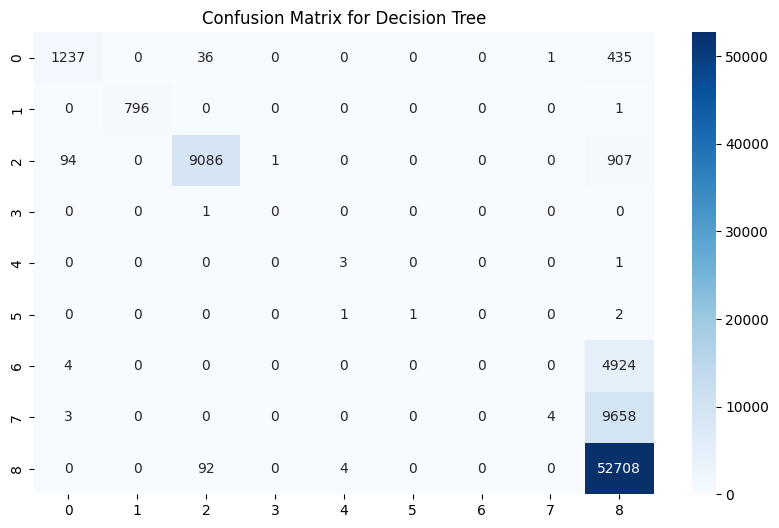

In [ ]:
DT = DecisionTreeClassifier() #Initialising the Decision Tree Classifier

#Training the Decision Tree classifer on the training data
start = time.time()
print('Decision Tree program start...')
DT.fit(X_train, Y_train)

#Make the Predictions on the testing data using the Decision Tree Classifier
y_pred_dt = DT.predict(X_test)


score_dt = DT.score(X_test, Y_test) # Calculating the accuracy score of the Decision Tree Classifier

# Printing the accuracy score of the Decision Tree classifier
print('Decision Tree Score:', score_dt)

#Printing out the time taken to train and test the Decision Tree Classifier
print('Time cost:', time.time() - start, 'seconds')

# Printing the classification report for the Decision Tree classifier
print("Decision Tree Classification Report:")
print(classification_report(Y_test, y_pred_dt))

#Printing the Confusion Matrix for the Decision Tree Classifier
conf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

#Plotting the Confusion Matrix Heatmap for the Decision Tree Classifier
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

#Calculating the accuracy score of the Decision Tree classifier
accuracy_score_dt1 = accuracy_score(Y_test, y_pred_dt)

Naive Bayes program start...
Naive Bayes Score: 0.29605
Time cost: 1.1632418632507324 seconds
Naive Bayes Classification Report:
                           precision    recall  f1-score   support

           -   Benign   -       0.68      0.10      0.17      1709
                   Attack       0.80      0.97      0.88       797
                   Benign       1.00      0.01      0.01     10088
                      C&C       0.01      1.00      0.01         1
            C&C-HeartBeat       0.00      0.00      0.00         4
                C&C-Torii       0.00      0.00      0.00         4
                     DDoS       0.00      0.00      0.00      4928
                    Okiru       0.15      1.00      0.26      9665
PartOfAHorizontalPortScan       0.90      0.25      0.39     52804

                 accuracy                           0.30     80000
                macro avg       0.39      0.37      0.19     80000
             weighted avg       0.76      0.30      0.30     8000

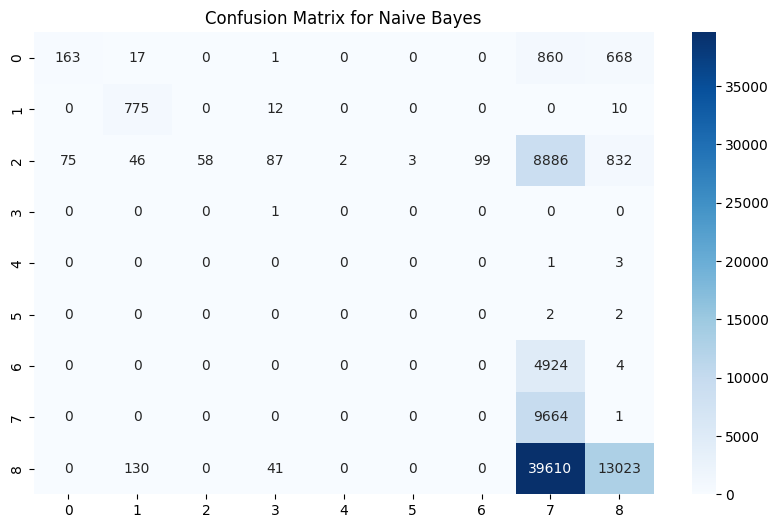

In [ ]:
NB = GaussianNB() #Intitalising the Naives Bayes Classifier

#Training the Naives Bayes Classifier on the training data
start = time.time()
print('Naive Bayes program start...')
NB.fit(X_train, Y_train)

# Making the predictions on the testing data using the Naives bayes Classifer
y_pred_nb = NB.predict(X_test)

# Calculate the accuracy score of the Naive Bayes classifier
score_nb = NB.score(X_test, Y_test)


print('Naive Bayes Score:', score_nb) #Printing the accuracy score of the Naives Bayes Classifier

print('Time cost:', time.time() - start, 'seconds') #Printing out the time taken to train and test the Naives Bayes Classifier

#Printing the classification report for the Naive Bayes Classifier
print("Naive Bayes Classification Report:")
print(classification_report(Y_test, y_pred_nb))

#Printing the Confusion Matrix for the Naives Bayes Classifier
conf_matrix_nb = confusion_matrix(Y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_nb)

#Plotting the confusion matrix Heatmap for the Naives Bayes Classifer
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

#Calcuating the accuracy score of the Naives Bayes Classifier
accuracy_score_nb1 = accuracy_score(Y_test, y_pred_nb)

<ipython-input-12-d2a19252fe83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifiers, y=scores, palette='Blues')


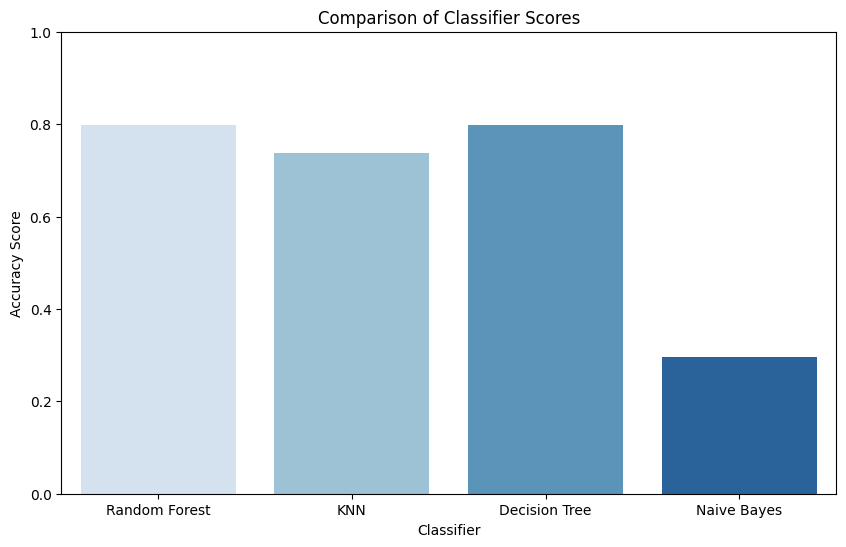

In [ ]:
#Creates a list of utilised Classifers
classifiers = ['Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes']
scores = [score_rf, score_knn, score_dt, score_nb] #Creating a list of accuacy scores for each classifer.

#Plotting the bar chart comparing the accuracy scores of the classifers
plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=scores, palette='Blues')
plt.title('Comparison of Classifier Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Compare the accuracy scores
if accuracy_score_rf1 > accuracy_score_dt1:
    print('Random Forest is the better classifier than the Decision Tree classifier for the dataset parsed due to Random Forest obtaining a higher score:',
          '\n' 'as the Random Forest model accuracy score is: {0:0.2f}%'.format(accuracy_score_rf1),
          '\n' 'and the Decision Tree model accuracy score is {0:0.2f}%'.format(accuracy_score_dt1))

else:
    print('Decision Tree is the better classifier than the Random Forest classifier for the dataset parsed due to Decision Tree obtaining a higher score:',
          '\n' 'as the Decision Tree model accuracy score is: {0:0.2f}%'.format(accuracy_score_dt1),
          '\n' 'and the Random Forest model accuracy score is {0:0.2f}%'.format(accuracy_score_rf1))
#Comparing the accuracy score of the Random Forest classifier to the accuracy score of the KNN classifer
if accuracy_score_rf1 > accuracy_score_knn1:
    print('Random Forest is the better classifier than the KNN classifier for the dataset parsed due to Random Forest obtaining a higher score:',
          '\n' 'as the Random Forest model accuracy score is: {0:0.2f}%'.format(accuracy_score_rf1),
          '\n' 'and the KNN model accuracy score is {0:0.2f}%'.format(accuracy_score_knn1))

else:
    print('KNN is the better classifier than the Random Forest classifier for the dataset parsed due to KNN obtaining a higher score:',
          '\n' 'as the KNN model accuracy score is: {0:0.2f}%'.format(accuracy_score_knn1),
          '\n' 'and the Random Forest model accuracy score is {0:0.2f}%'.format(accuracy_score_rf1))

# Compare the accuracy score of the Random Forest Classifier to the accuracy of the Naive Bayes classifier
if accuracy_score_rf1 > accuracy_score_nb1:
    print('Random Forest is the better classifier than the Naive Bayes classifier for the dataset parsed due to Random Forest obtaining a higher score:',
          '\n' 'as the Random Forest model accuracy score is: {0:0.2f}%'.format(accuracy_score_rf1),
          '\n' 'and the Naive Bayes model accuracy score is {0:0.2f}%'.format(accuracy_score_nb1))

else:
    print('Naive Bayes is the better classifier than the Random Forest classifier for the dataset parsed due to Naive Bayes obtaining a higher score:',
          '\n' 'as the Naive Bayes model accuracy score is: {0:0.2f}%'.format(accuracy_score_nb1),
          '\n' 'and the Random Forest model accuracy score is {0:0.2f}%'.format(accuracy_score_rf1))

Random Forest is the better classifier than the Decision Tree classifier for the dataset parsed due to Random Forest obtaining a higher score: 
as the Random Forest model accuracy score is: 0.80% 
and the Decision Tree model accuracy score is 0.80%
Random Forest is the better classifier than the KNN classifier for the dataset parsed due to Random Forest obtaining a higher score: 
as the Random Forest model accuracy score is: 0.80% 
and the KNN model accuracy score is 0.74%
Random Forest is the better classifier than the Naive Bayes classifier for the dataset parsed due to Random Forest obtaining a higher score: 
as the Random Forest model accuracy score is: 0.80% 
and the Naive Bayes model accuracy score is 0.30%
